In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [41]:
import re
import math

In [66]:
# Loading the dataset
data = pd.read_excel('GooglePlaystore.xlsx')

In [86]:
data = data.convert_dtypes()

In [68]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up


In [69]:
len(data)

10841

# Preprocessing

## 1. Remove the outlier

In [70]:
data.drop(list(data[data['Reviews']=='3.0M'].index),inplace=True)

In [71]:
len(data)

10840

## 2. Remove the rows having 'Varies with device'

In [72]:
# extracting the indices of rows having 'Varies with device'
index_list = list(set(sum([list(data[data[i]=='Varies with device'].index) for i in list(data.columns)],[])))

In [73]:
len(index_list)

1781

In [74]:
data.drop(index_list,inplace=True)

In [75]:
len(data)

9059

## 3. Android Ver column in float and in the format of x.x

In [109]:
data["Android Ver"]=pd.to_numeric(data["Android Ver"], errors='coerce')
data["Android Ver"]=data["Android Ver"].apply(lambda x: float(re.findall("^\w.\w",x)[0]) if type(x)==type('string') else x )

## 4. Installs column in int and removing + & ,

In [95]:
data["Installs"]=data["Installs"].apply(lambda x: int(x.replace('+','').replace(',','')))

In [97]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1,2.3


## 5. Handling N/A values in Rating column

In [115]:
# Dropping the raws
data.drop(list(data[(data['Reviews']<100)&(data['Installs']<50000)&(data['Rating']!=type(np.float64(1.3)))].index),inplace=True)

In [122]:
len(data)

7196

In [134]:
cat_mean = data.groupby(['Category'])['Rating'].mean().reset_index()
cat_mean = cat_mean.rename(columns={'Rating':'mean'})
data = pd.merge(data,cat_mean,on=['Category'])
data['Rating']=data['Rating'].fillna(data['mean'])

In [138]:
del data['mean']

## 6. Preprocess the Size column

In [159]:
data['Size'] = data['Size'].apply(lambda x: int(float(re.findall("(.*)M",x)[0])*1000000) if ('M' in x) else int(float(re.findall("(.*)k",x)[0])*1000) )

# Analysis

## 1. describe column details

In [162]:
data["Current Ver"]=pd.to_numeric(data["Current Ver"], errors='coerce')

In [163]:
data.describe()

,Rating,Reviews,Size,Installs,Price,Current Ver,Android Ver
count,7196.000000,7.196000e+03,7.196000e+03,7.196000e+03,7196.000000,2.527000e+03,7194.000000
mean,4.194948,3.124503e+05,2.337325e+07,8.666153e+06,1.101431,5.606565e+05,3.863192
std,0.388561,1.928127e+06,2.339883e+07,5.085757e+07,17.111699,2.499360e+07,0.821497
min,1.600000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000,1.000000e-01,1.000000
25%,4.086364,1.817500e+02,5.700000e+06,1.000000e+04,0.000000,1.087000e+00,4.000000
50%,4.215337,3.255500e+03,1.500000e+07,1.000000e+05,0.000000,1.510000e+00,4.100000
75%,4.400000,4.311525e+04,3.300000e+07,1.000000e+06,0.000000,3.060000e+00,4.100000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000,1.255162e+09,8.000000


## 2. top 3 free applications for each category

In [195]:
def top_3(col_name):
    dataframe = pd.DataFrame(columns=['Category','App',col_name])
    type_col = list(data['Category'].unique())
    for i in type_col:
        dataframe = dataframe.append(data[(data['Category']==i)&(data['Type']=='Free')].sort_values(by=[col_name], ascending=False)[['Category','App',col_name]].iloc[:3],ignore_index=True)
    return dataframe


In [196]:
Rating = top_3('Rating')
Rating

,Category,App,Rating
0,ART_AND_DESIGN,Harley Quinn wallpapers HD,4.8
1,ART_AND_DESIGN,Cardi B Wallpaper,4.8
2,ART_AND_DESIGN,X Launcher: With OS11 Style Theme & Control Ce...,4.7
3,AUTO_AND_VEHICLES,DMV Permit Practice Test 2018 Edition,4.9
4,AUTO_AND_VEHICLES,Tickets SDA 2018 and Exam from the State Traff...,4.9
...,...,...,...
94,NEWS_AND_MAGAZINES,أحداث وحقائق | خبر عاجل في اخبار العالم,4.8
95,NEWS_AND_MAGAZINES,"Topbuzz: Breaking News, Videos & Funny GIFs",4.7
96,MAPS_AND_NAVIGATION,GPS Speedometer and Odometer,4.8
97,MAPS_AND_NAVIGATION,Trucker Path – Truck Stops & Weigh Stations,4.7


In [198]:
Installs = top_3('Installs')
Installs

,Category,App,Installs
0,ART_AND_DESIGN,Tattoo Name On My Photo Editor,10000000
1,ART_AND_DESIGN,"Canva: Poster, banner, card maker & graphic de...",10000000
2,ART_AND_DESIGN,ibis Paint X,10000000
3,AUTO_AND_VEHICLES,AutoScout24 - used car finder,10000000
4,AUTO_AND_VEHICLES,Fines of the State Traffic Safety Inspectorate...,5000000
...,...,...,...
94,NEWS_AND_MAGAZINES,Google News,1000000000
95,NEWS_AND_MAGAZINES,Google News,1000000000
96,MAPS_AND_NAVIGATION,GPS Navigation & Offline Maps Sygic,50000000
97,MAPS_AND_NAVIGATION,"Yahoo! transit guide free timetable, operation...",10000000


In [197]:
Reviews = top_3('Reviews')
Reviews

,Category,App,Reviews
0,ART_AND_DESIGN,ibis Paint X,224399
1,ART_AND_DESIGN,FlipaClip - Cartoon animation,194216
2,ART_AND_DESIGN,"Canva: Poster, banner, card maker & graphic de...",174531
3,AUTO_AND_VEHICLES,Tickets + PDA 2018 Exam,197136
4,AUTO_AND_VEHICLES,AutoScout24 - used car finder,186648
...,...,...,...
94,NEWS_AND_MAGAZINES,Google News,877643
95,NEWS_AND_MAGAZINES,Google News,877635
96,MAPS_AND_NAVIGATION,GPS Navigation & Offline Maps Sygic,1421884
97,MAPS_AND_NAVIGATION,Grab Driver,301413


## 3. Average, min and max of paid items

In [202]:
print('Average',data[data['Type']=='Paid']['Price'].mean())
print('Maximum',data[data['Type']=='Paid']['Price'].max())
print('Minimum',data[data['Type']=='Paid']['Price'].min())

Average 16.581380753138074
Maximum 400.0
Minimum 0.99


# Visualization

## 1. Number of applications per Genre Pie chart

In [217]:
data['Genres']=data['Genres'].apply(lambda x: x.split(';') if ';' in x else x)
data1 = data.explode('Genres',ignore_index=True)

Text(0.5, 1.0, 'Number of applications per Genre')

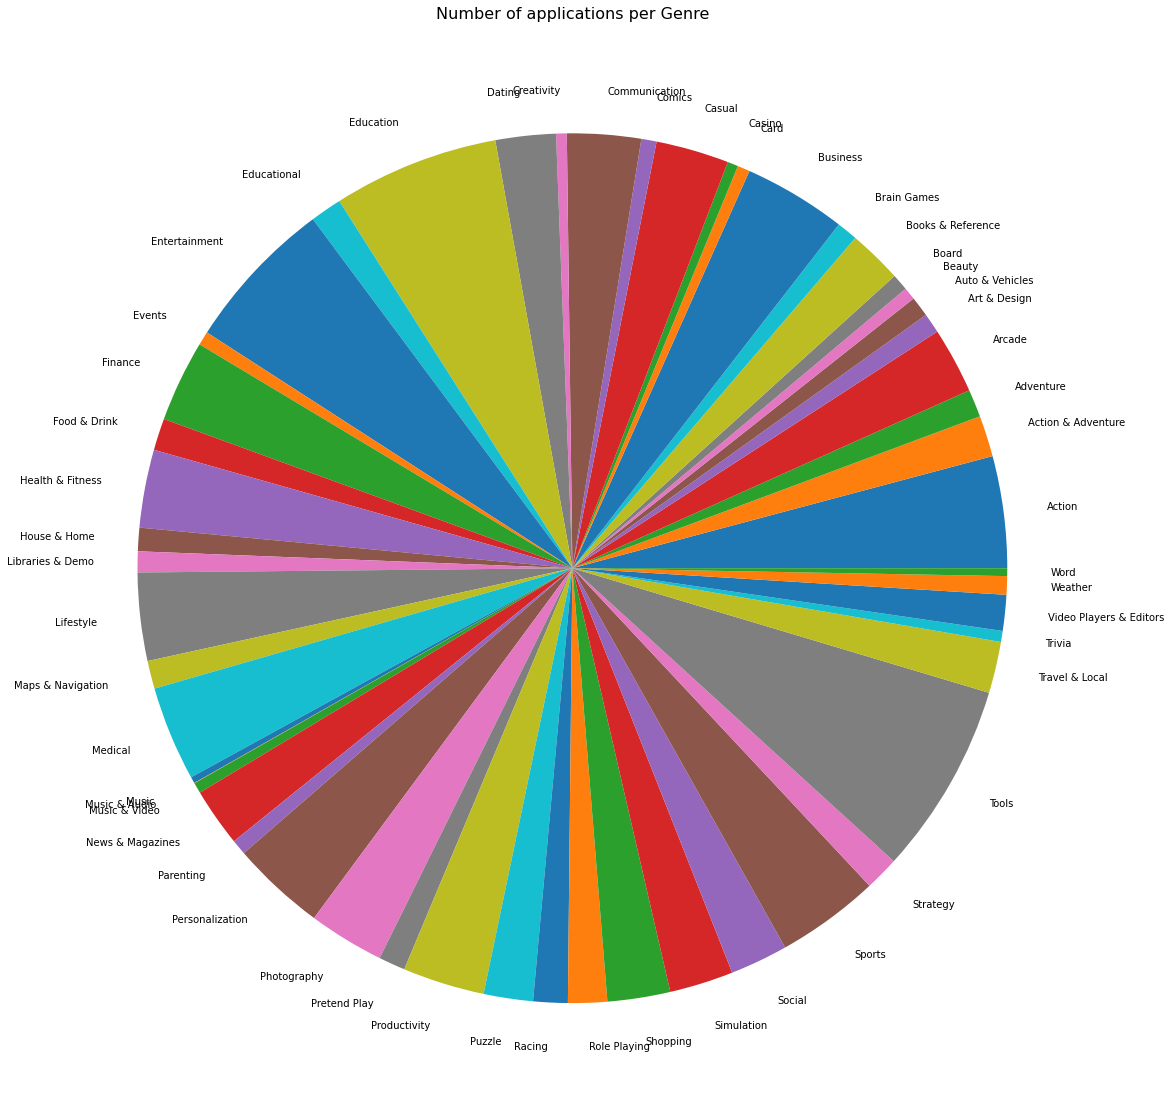

In [224]:
vis1 = data1.groupby(['Genres'])['App'].count().reset_index()

Fig = plt.figure(figsize=(20,20))
plt.pie(vis1['App'],labels=list(vis1['Genres'].unique()))
plt.title('Number of applications per Genre',fontsize=16)

## 2. Box plots for Ratings for categoris BUSINESS and EDUCATION

Text(0.5, 1.0, 'Ratings of 1: BUSINESS and 2:EDUCATION ')

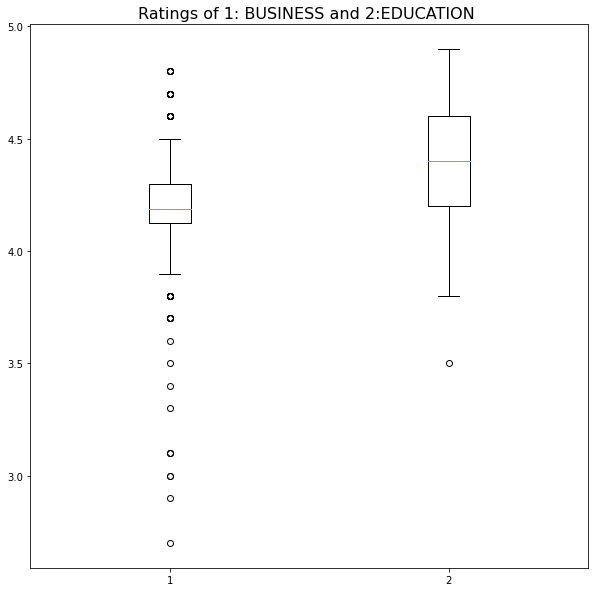

In [234]:
Fig = plt.figure(figsize=(10,10))

plt.boxplot([data[data['Category']=='BUSINESS']['Rating'].values,data[data['Category']=='EDUCATION']['Rating'].values])
plt.title('Ratings of 1: BUSINESS and 2:EDUCATION ',fontsize=16)